In [1]:

pip install tweepy

Note: you may need to restart the kernel to use updated packages.


In [8]:
#import twitter
import tweepy
import tweepy as tw
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import collections

import tweepy as tw
import nltk
from nltk.corpus import stopwords
import re
import networkx
from textblob import TextBlob

import warnings

In [3]:
#### On rappellle que les librairie s'installe depuis la conole anaconda à l'aide d'un pip install

#### On remplace ici les valeurs des Key, secret et Token par celle de l'application crée sur l'environnement twitter
CONSUMER_KEY = 'XLJEHwCIuMlA5dOtASWrPDVZL'
CONSUMER_SECRET = 'yYsTNi7T9MlmRx9pSaKaaKruGFPntcneekFEyY9DevfrxCKJfm'
OAUTH_TOKEN = 'Q1367772752258752512-sxnY5NG0ErYtrBWLPqTT6V5yiZ9H4'
OAUTH_TOKEN_SECRET = 'RVcmFJpkLSlnmZWD4Cu5uKDp4G4iQvAIoO67YAziE4hUH'


##### Connecxion à l'API
auth = tweepy.OAuthHandler(CONSUMER_KEY, CONSUMER_SECRET)

#  Token and secret
auth.set_access_token(OAUTH_TOKEN, OAUTH_TOKEN_SECRET)

# Création de l'API
api = tweepy.API(auth) 

# # Afficher l'objet twitter API

api

# Recuperation des twitt du journal le monde

In [4]:
liste = ["@lemondefr"]

#### Récuperer les tweets du profil Lemonde

result = [] #### liste vide à initaliser
for ele in liste: ##### Pour chaque profil twitter
    print(ele) #### Afficher le profil
    print(len(api.user_timeline(ele, count = 100))) #### Récupérer les 100 derniers tweets du mur
    result.append(api.user_timeline(ele, count = 2000)) #### Stocker ces élements dans une liste

@lemondefr
100


In [5]:
len(result[0]) ##### Nombre de tweets maximum ici est de 200

200

In [6]:
result[0][0].text

'« One Piece » : cinq questions pour comprendre le phénomène https://t.co/jDcH8hwdSa'

In [7]:
result[0][-1].text #### affichons le 200eme tweets ici

'A la Guadeloupe, sept personnes interpellées après de nouveaux incidents entre manifestants et forces de l’ordre https://t.co/4L4cpvXtyw'

In [11]:
warnings.filterwarnings("ignore")

##### On définie une fonction de nettoyage des donnée

def remove_url(txt):
    """Remplace les url trouvés par le caractère vide " "
    Parametre
    ----------
    txt : string
        la variable string que l'on soutaite remplacé
     Sortie
    -------
    Le fichier nettoyé des url
     """

    return " ".join(re.sub("([^0-9A-Za-z \t])|(\w+:\/\/\S+)", "", txt).split())


# On retire les caractères 
tweets_sans_urls = [remove_url(tweet.text)  for i in result for tweet in i]  #### Pour chaque journal, Pour chaque tweet dans un journal
#### Application de la fonction remove_url()

#### On stocke ces élements dans une liste de compréhensio

#### Qu'on renomme tweets_sans_urls

In [12]:
tweets_sans_urls

['One Piece cinq questions pour comprendre le phnomne',
 'Prsidence franaise de lUnion europenne Yannick Jadot rclame plus dengagements et de moyens en matire colo',
 'Vous tes Eric Zemmour lexutoire de nos mauvaises penses de notre impuissance',
 'Prsidentielle2022 Les partisans de la primaire populaire rvent dune candidature commune gauche',
 'Prsidentielle2022 Arnaud Montebourg prt offrir sa candidature un projet et candidat commun pour l',
 'Soupon de fte de Nol sans rgles sanitaires Boris Johnson promet une enqute et prsente des excuses',
 'A la veille du sommet de Joe Biden la Chine saffiche en dmocratie exemplaire',
 'Une attaque au sabre perptre contre un camp de migrants dans le 12e arrondissement de Paris',
 'Covid19 en Europe la vaccination obligatoire simpose comme lultime recours dans les pays qui rsistent au vac',
 'Deux hommes mis en examen pour un projet dattaque au couteau dinspiration djihadiste',
 'Les 28 propositions des dputs pour lutter contre labstention',
 'A lO

In [13]:
tweets_sans_urls[2].split()

['Vous',
 'tes',
 'Eric',
 'Zemmour',
 'lexutoire',
 'de',
 'nos',
 'mauvaises',
 'penses',
 'de',
 'notre',
 'impuissance']

In [14]:
len(tweets_sans_urls)

200

In [16]:
mots_dans_tweets = [tweet.lower().split() for tweet in tweets_sans_urls] #### Uniformisation des textes ie minuscules
mots_dans_tweets####Split liste avec l'ensemble

[['one', 'piece', 'cinq', 'questions', 'pour', 'comprendre', 'le', 'phnomne'],
 ['prsidence',
  'franaise',
  'de',
  'lunion',
  'europenne',
  'yannick',
  'jadot',
  'rclame',
  'plus',
  'dengagements',
  'et',
  'de',
  'moyens',
  'en',
  'matire',
  'colo'],
 ['vous',
  'tes',
  'eric',
  'zemmour',
  'lexutoire',
  'de',
  'nos',
  'mauvaises',
  'penses',
  'de',
  'notre',
  'impuissance'],
 ['prsidentielle2022',
  'les',
  'partisans',
  'de',
  'la',
  'primaire',
  'populaire',
  'rvent',
  'dune',
  'candidature',
  'commune',
  'gauche'],
 ['prsidentielle2022',
  'arnaud',
  'montebourg',
  'prt',
  'offrir',
  'sa',
  'candidature',
  'un',
  'projet',
  'et',
  'candidat',
  'commun',
  'pour',
  'l'],
 ['soupon',
  'de',
  'fte',
  'de',
  'nol',
  'sans',
  'rgles',
  'sanitaires',
  'boris',
  'johnson',
  'promet',
  'une',
  'enqute',
  'et',
  'prsente',
  'des',
  'excuses'],
 ['a',
  'la',
  'veille',
  'du',
  'sommet',
  'de',
  'joe',
  'biden',
  'la',
  'c

In [17]:
#Liste de tous les mots sur les tweets
ensemble_mots_pas_urls = list(itertools.chain(*mots_dans_tweets))

# Compte des mots
counts_no_urls = collections.Counter(ensemble_mots_pas_urls)

counts_no_urls.most_common(40) #### Compte l'ensemble des mots dans le mots_dans_tweets

[('de', 177),
 ('la', 121),
 ('le', 70),
 ('les', 70),
 ('en', 63),
 ('des', 52),
 ('du', 41),
 ('et', 37),
 ('un', 33),
 ('rt', 32),
 ('pour', 28),
 ('au', 27),
 ('par', 27),
 ('sur', 27),
 ('une', 25),
 ('a', 25),
 ('dans', 24),
 ('plus', 17),
 ('est', 16),
 ('son', 13),
 ('sa', 12),
 ('aux', 11),
 ('contre', 10),
 ('pas', 10),
 ('covid19', 9),
 ('qui', 9),
 ('gouvernement', 9),
 ('monde', 9),
 ('avec', 9),
 ('dune', 8),
 ('que', 8),
 ('scholz', 8),
 ('macron', 8),
 ('tribune', 8),
 ('dun', 8),
 ('comme', 7),
 ('politique', 7),
 ('ingalits', 7),
 ('ne', 7),
 ('emmanuel', 7)]

In [18]:
clean_tweets_no_urls = pd.DataFrame(counts_no_urls.most_common(15),
                             columns=['mots', 'compte'])

clean_tweets_no_urls.head()

,mots,compte
0,de,177
1,la,121
2,le,70
3,les,70
4,en,63


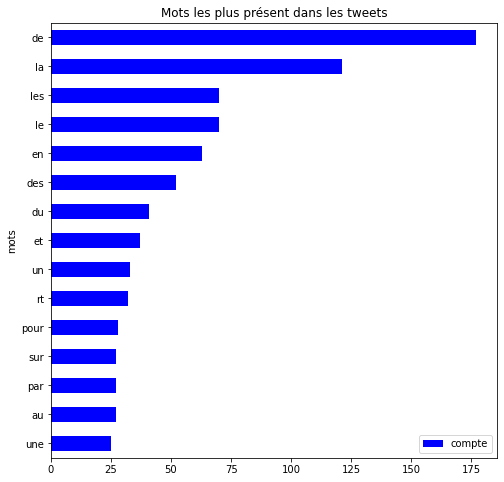

In [19]:
fig, ax = plt.subplots(figsize=(8, 8))

###Affichons le graphe
clean_tweets_no_urls.sort_values(by='compte').plot.barh(x='mots',
                      y='compte',
                      ax=ax,
                      color="blue")

ax.set_title("Mots les plus présent dans les tweets")

plt.show()

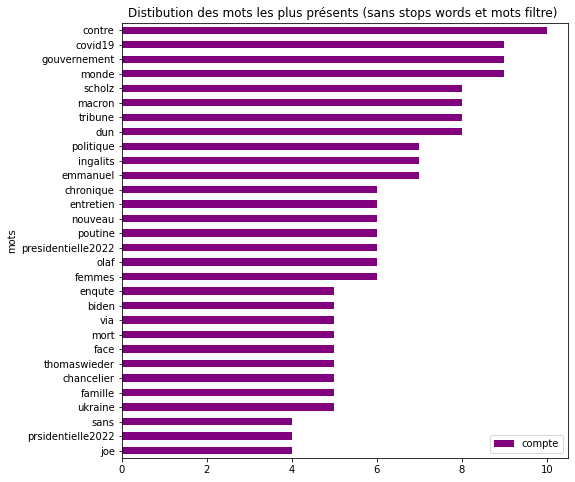

In [36]:
a_retirer = ["rt", "a", "aprs", "ans", "plus", "figarolive", "rien", "bien","non","fait","tous","comme","cest", "tchat", "damienleloup", "dix","deux","dune"]

#### On réutilise double listes

tweet_sans_mots_bannnis = [[mots for mots in mots_tweet if mots  not in a_retirer ] #### Pour chaque mots dans un tweet Si le mot n'est pas dans la lsite à retire, on l'affiche
                 for mots_tweet in tweet_sans_sw] ####POur chaque tweet dans la liste

# for mots_tweet in tweet_sans_sw:
#     for mots in mots_tweet:
#         if mots  not in a_retirer 
#             print(mots)

ens_mot_sans_smb = list(itertools.chain(*tweet_sans_mots_bannnis))
compte_tw_no_smb = collections.Counter(ens_mot_sans_smb)
compte_tw_no_smb.most_common(15)

tweet_filtre_2 = pd.DataFrame(compte_tw_no_smb.most_common(30),
                             columns=['mots', 'compte'])

fig, ax = plt.subplots(figsize=(8, 8))

tweet_filtre_2.sort_values(by='compte').plot.barh(x='mots',
                      y='compte',
                      ax=ax,
                      color="purple")

ax.set_title("Distibution des mots les plus présents (sans stops words et mots filtre) ")

plt.show()

### Etape 3: Wordcloud

In [ ]:
pip install WordCloud
import wordcloud

In [42]:
import wordcloud

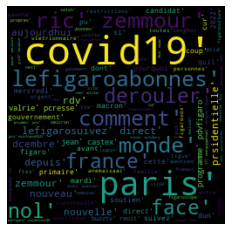

In [49]:
# Start with one review:
text = str(tweet_sans_mots_bannnis)

# Create and generate a word cloud image:
wordcloud = WordCloud(width = 250, height = 250, 
                background_color ='black').generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

157

Temps d'execution 0.001001596450805664


In [34]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

## Journal Le Monde

In [48]:
# liste = ["@lemondefr"]
# result = []
# for ele in liste: 
#     print(ele)
#     print(len(api.user_timeline(ele, count = 10)))
#     result.append(api.user_timeline(ele, count = 2000))

# result[0][150]

# # On retire les caractères 
# tweets_sans_urls = [remove_url(tweet.text)  for i in result for tweet in i]

# tweets_sans_urls

# mots_dans_tweets = [tweet.lower().split() for tweet in tweets_sans_urls]

# tweet_sans_sw = [[mots for mots in mots_tweet if not mots in stop_words]
#                  for mots_tweet in mots_dans_tweets]

# ens_mot_sans_sw = list(itertools.chain(*tweet_sans_sw))
# compte_tw_no_sw = collections.Counter(ens_mot_sans_sw)
# compte_tw_no_sw.most_common(15)

# tweet_filtre_2 = pd.DataFrame(compte_tw_no_sw.most_common(30),
#                              columns=['mots', 'compte'])

# fig, ax = plt.subplots(figsize=(8, 8))

# tweet_filtre_2.sort_values(by='compte').plot.barh(x='mots',
#                       y='compte',
#                       ax=ax,
#                       color="purple")

# ax.set_title("Distibution des mots les plus présents (sans stops words et mots filtre) ")

# plt.show()

# a_retirer = ["rt", "a", "apr", "ans", "plus", "figarolive", "rien", "bien","non","fait","tous","comme", "tchat", "damienleloup"]

# #### On réutilise double listes

# tweet_sans_mots_bannnis = [[mots for mots in mots_tweet if mots  not in a_retirer ]
#                  for mots_tweet in tweet_sans_sw]

# ens_mot_sans_smb = list(itertools.chain(*tweet_sans_mots_bannnis))
# compte_tw_no_smb = collections.Counter(ens_mot_sans_smb)
# compte_tw_no_smb.most_common(15)

# tweet_filtre_2 = pd.DataFrame(compte_tw_no_smb.most_common(30),
#                              columns=['mots', 'compte'])

# fig, ax = plt.subplots(figsize=(8, 8))

# tweet_filtre_2.sort_values(by='compte').plot.barh(x='mots',
#                       y='compte',
#                       ax=ax,
#                       color="purple")

# ax.set_title("Distibution des mots les plus présents (sans stops words et mots filtre) ")

# plt.show()

# # Start with one review:
# text = str(tweet_sans_mots_bannnis)

# # Create and generate a word cloud image:
# wordcloud = WordCloud(width = 2500, height = 2500, 
#                 background_color ='white', 
#                 min_font_size = 10).generate(text)

# # Display the generated image:
# plt.imshow(wordcloud, interpolation='bilinear')
# plt.axis("off")
# plt.show()

# Journal le Figaro

In [45]:
#### Etape 1: récupéation des tweets

liste = ["@Le_Figaro"]

#### Récuperer les tweets du profil Lemonde

result = [] #### liste vide à initaliser
for ele in liste: ##### Pour chaque profil twitter
    print(ele) #### Afficher le profil
    print(len(api.user_timeline(ele, count = 100))) #### Récupérer les 100 derniers tweets du mur
    result.append(api.user_timeline(ele, count = 2000)) #### Stocker ces élements dans une liste

@Le_Figaro
100


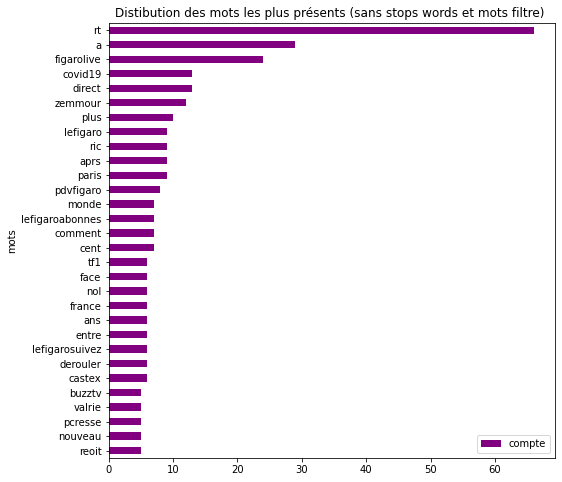

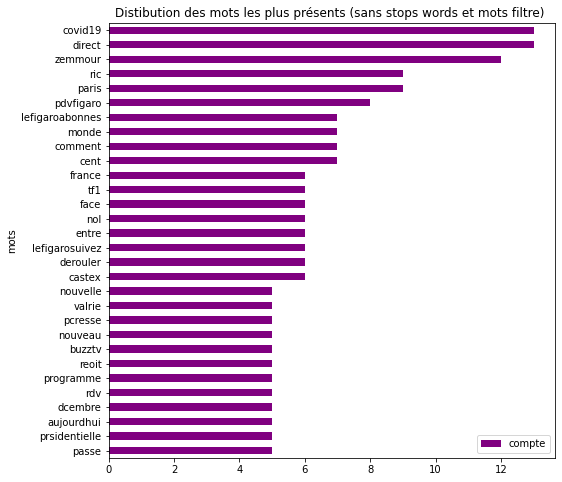

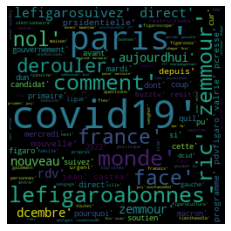

In [46]:
#### Etape 2 : Méthode de nettoyage

# On retire les caractères 
tweets_sans_urls = [remove_url(tweet.text)  for i in result for tweet in i]

tweets_sans_urls

mots_dans_tweets = [tweet.lower().split() for tweet in tweets_sans_urls]
#mots_dans_tweets

#stop_words

tweet_sans_sw = [[mots for mots in mots_tweet if not mots in stop_words]
                 for mots_tweet in mots_dans_tweets]

ens_mot_sans_sw = list(itertools.chain(*tweet_sans_sw))
compte_tw_no_sw = collections.Counter(ens_mot_sans_sw)
compte_tw_no_sw.most_common(15)

tweet_filtre_2 = pd.DataFrame(compte_tw_no_sw.most_common(30),
                             columns=['mots', 'compte'])

fig, ax = plt.subplots(figsize=(8, 8))

tweet_filtre_2.sort_values(by='compte').plot.barh(x='mots',
                      y='compte',
                      ax=ax,
                      color="purple")

ax.set_title("Distibution des mots les plus présents (sans stops words et mots filtre) ")

plt.show()

a_retirer = ["rt", "a","via", "lefigaro", "madamefigaro" ,"sport24team","flash","chez","prs", "aprs", "ans", "plus", "figarolive", "rien", "bien","non","fait","tous","comme","cest", "tchat", "damienleloup", "dix","deux","dune"]

#### On réutilise double listes

tweet_sans_mots_bannnis = [[mots for mots in mots_tweet if mots  not in a_retirer ] #### Pour chaque mots dans un tweet Si le mot n'est pas dans la lsite à retire, on l'affiche
                 for mots_tweet in tweet_sans_sw] ####POur chaque tweet dans la liste

# for mots_tweet in tweet_sans_sw:
#     for mots in mots_tweet:
#         if mots  not in a_retirer 
#             print(mots)

ens_mot_sans_smb = list(itertools.chain(*tweet_sans_mots_bannnis))
compte_tw_no_smb = collections.Counter(ens_mot_sans_smb)
compte_tw_no_smb.most_common(15)

tweet_filtre_2 = pd.DataFrame(compte_tw_no_smb.most_common(30),
                             columns=['mots', 'compte'])

fig, ax = plt.subplots(figsize=(8, 8))

tweet_filtre_2.sort_values(by='compte').plot.barh(x='mots',
                      y='compte',
                      ax=ax,
                      color="purple")

ax.set_title("Distibution des mots les plus présents (sans stops words et mots filtre) ")

plt.show()

#### Etape 3: Wordcloud

#pip install WordCloud

from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

# Commencons par un avis:
text = str(tweet_sans_mots_bannnis)

# Creation et generation de image word cloud:
wordcloud = WordCloud(width = 250, height = 250, 
                background_color ='black').generate(text)

# Affichons l'image genere:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()